# Digits recongition

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

from keras import Sequential
from keras.layers import Dense, MaxPool2D, Flatten, Conv2D
from tensorflow.keras.callbacks import EarlyStopping

# Save model in JS usable format
import tensorflowjs as tsjs

import tensorflow as tf

# Mutliple outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Plots for retina screens
%config InlineBackend.figure_format='retina'

In [14]:
def evalute_model(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.show();
    print(classification_report(y_test, y_pred))
    
    
def plot_predicted_img(X, y = None, y_pred = None, n=25):
    '''
        X : needs to bee a 28x28 matrix
        y : Array of labels
        y_pred : Array of predicted labels
    '''
    plt.figure(figsize=(25,20))
    for i in range(n):
        plt.subplot(1,n,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(X[i], cmap='gray')
        if y is None:
            plt.xlabel(f"{y_pred[i]}")
        else:
            plt.xlabel(f"{y[i]}|{y_pred[i]}")

    plt.show();
    
def plot_metrics(epochs, history): 
    '''Function to plot desired metrics'''
    metrics = [['accuracy', [0, epochs, 0, 1]], ['loss', [0, epochs, 0, 1]]]
    
    fig, axs = plt.subplots(1, len(metrics), figsize=(20,5))
    for i, ax in enumerate(axs.flatten()):
        x = metrics[i][0]
        ax.plot(history[x])
        ax.plot(history[f'val_{x}'])
        ax.set_title(f'Model\'s {x}')
        ax.set_ylabel(x)
        ax.set_xlabel('Epoch')
        #if x != 'loss':
        #    ax.text(1, history['val_accuracy'][-1], f"{round(history['val_accuracy'][-1], 2)}")
        ax.legend([f'train_{x}', f'val_{x}'], loc='lower left')
    fig.show();

---------

In [3]:
train_df = pd.read_csv('./data/train.csv')
train_df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
X = train_df.iloc[:, 1:]
y = train_df.iloc[:, 0]

print('X shape : ', X.shape)
print('y shape :', y.shape)
print('Image dimentions : 28x28px')

X shape :  (42000, 784)
y shape : (42000,)
Image dimentions : 28x28px


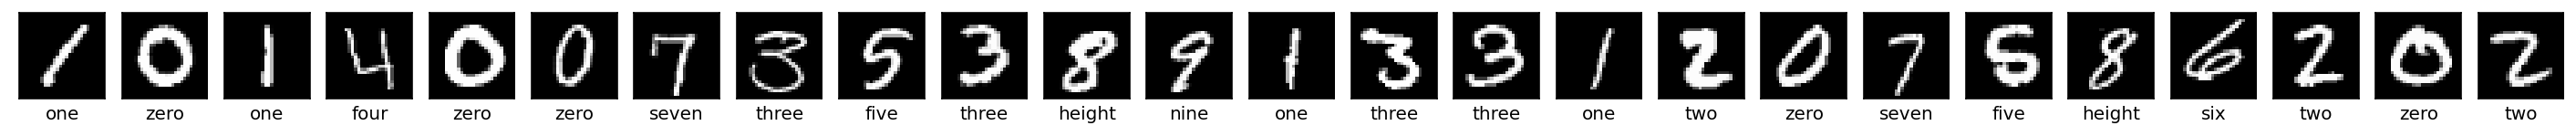

In [5]:
class_names = ['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'height', 'nine']

plt.figure(figsize=(25,20))
for i in range(25):
    plt.subplot(1,25,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(np.reshape(X.values[i], (28, 28)), cmap='gray')
    plt.xlabel(class_names[y[i]])
plt.show();

-------
## ANN

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

# ANN model
clf = Sequential()
clf.add(Dense(100, input_shape=(784,), activation='relu'))
clf.add(Dense(10, activation='softmax'))
clf.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

ann_history = clf.fit(X_train, y_train, validation_split=.2, batch_size=32, epochs=10, verbose=1)

ANN RESULTS :



/var/folders/0d/y3t008350zl1fy23qbsfnbgw0000gn/T/ipykernel_10343/2142059495.py:44: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show();


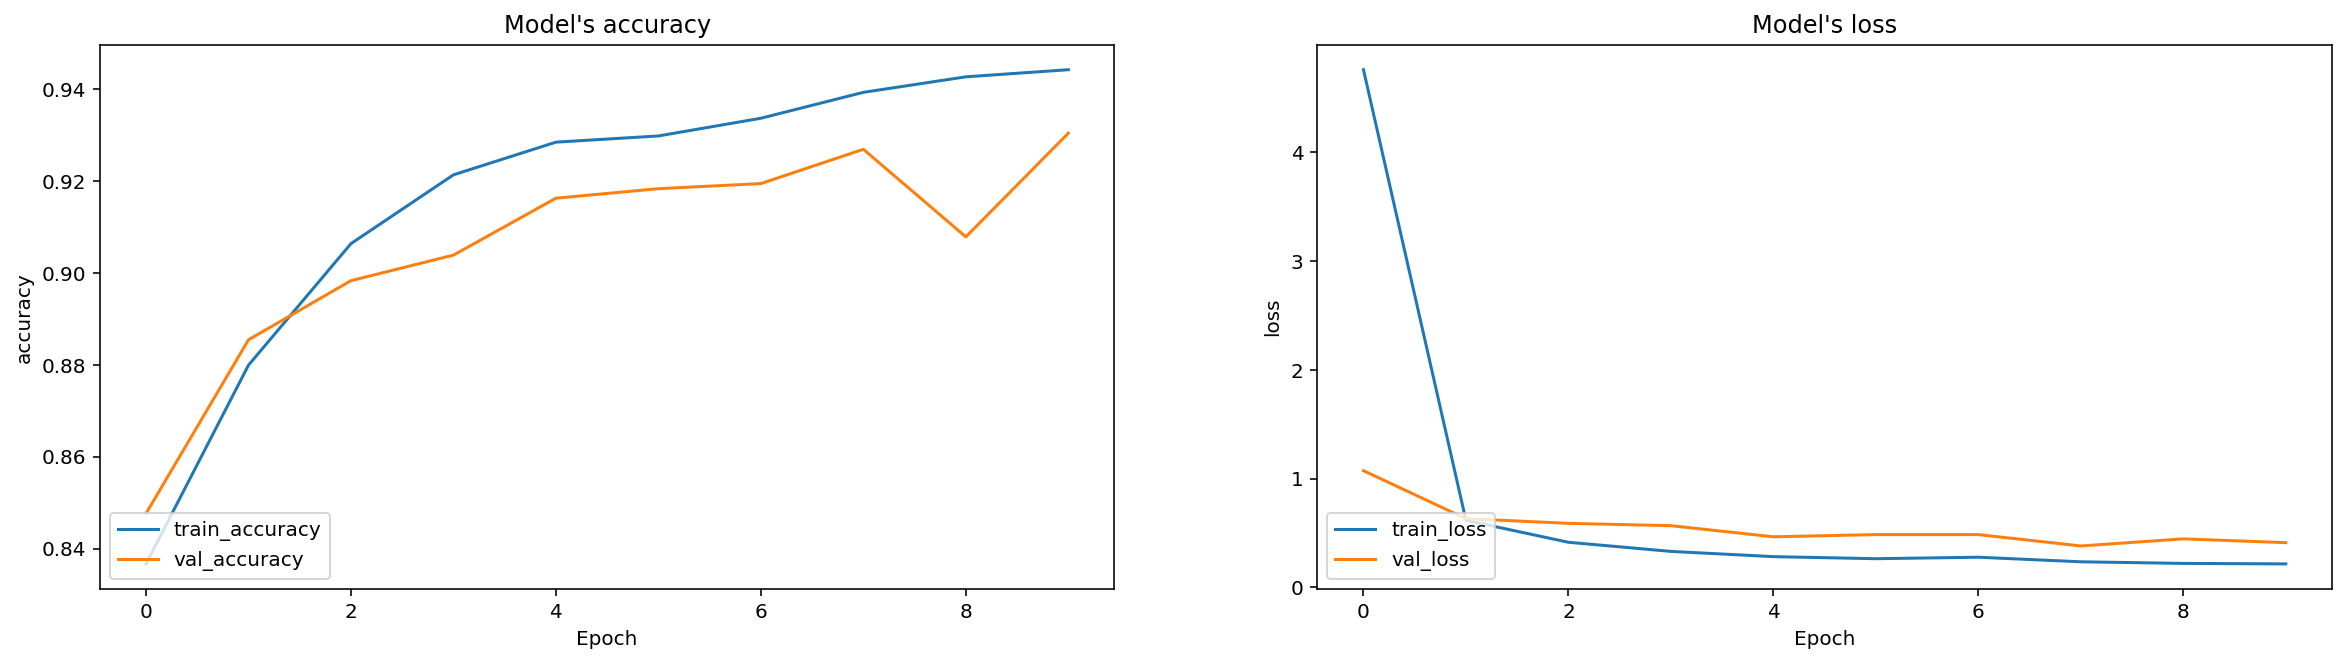

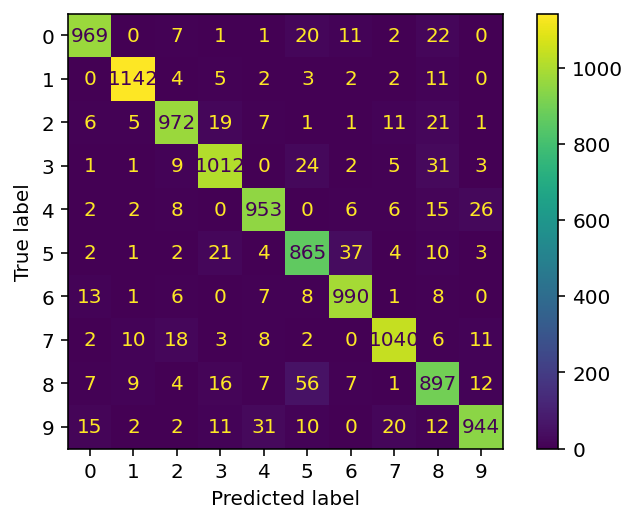

              precision    recall  f1-score   support

           0       0.95      0.94      0.95      1033
           1       0.97      0.98      0.97      1171
           2       0.94      0.93      0.94      1044
           3       0.93      0.93      0.93      1088
           4       0.93      0.94      0.94      1018
           5       0.87      0.91      0.89       949
           6       0.94      0.96      0.95      1034
           7       0.95      0.95      0.95      1100
           8       0.87      0.88      0.88      1016
           9       0.94      0.90      0.92      1047

    accuracy                           0.93     10500
   macro avg       0.93      0.93      0.93     10500
weighted avg       0.93      0.93      0.93     10500



In [8]:
print('ANN RESULTS :\n')
plot_metrics(10, ann_history.history)

y_pred = clf.predict(X_test).argmax(axis=1)
evalute_model(y_test, y_pred)

-------
## CNN

In [12]:
# Reshape data to noramlize data + 28*28px format
X = [np.reshape(a/255, (28, 28)) for a in X.values]
X = np.stack([i.tolist() for i in X])

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [ ]:
clf = Sequential()

# Convolutional layer
clf.add(Conv2D(25, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu', input_shape=(28,28,1)))
clf.add(MaxPool2D(pool_size=(1,1))) 

# Flatten output of the convolutional layer
clf.add(Flatten()) 

clf.add(Dense(100, activation='relu'))
clf.add(Dense(10, activation='softmax'))

clf.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

cnn_history = clf.fit(X_train, y_train, validation_split=.2, batch_size=32, epochs=10)

CNN RESULTS :



/var/folders/0d/y3t008350zl1fy23qbsfnbgw0000gn/T/ipykernel_10343/4143708164.py:44: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show();


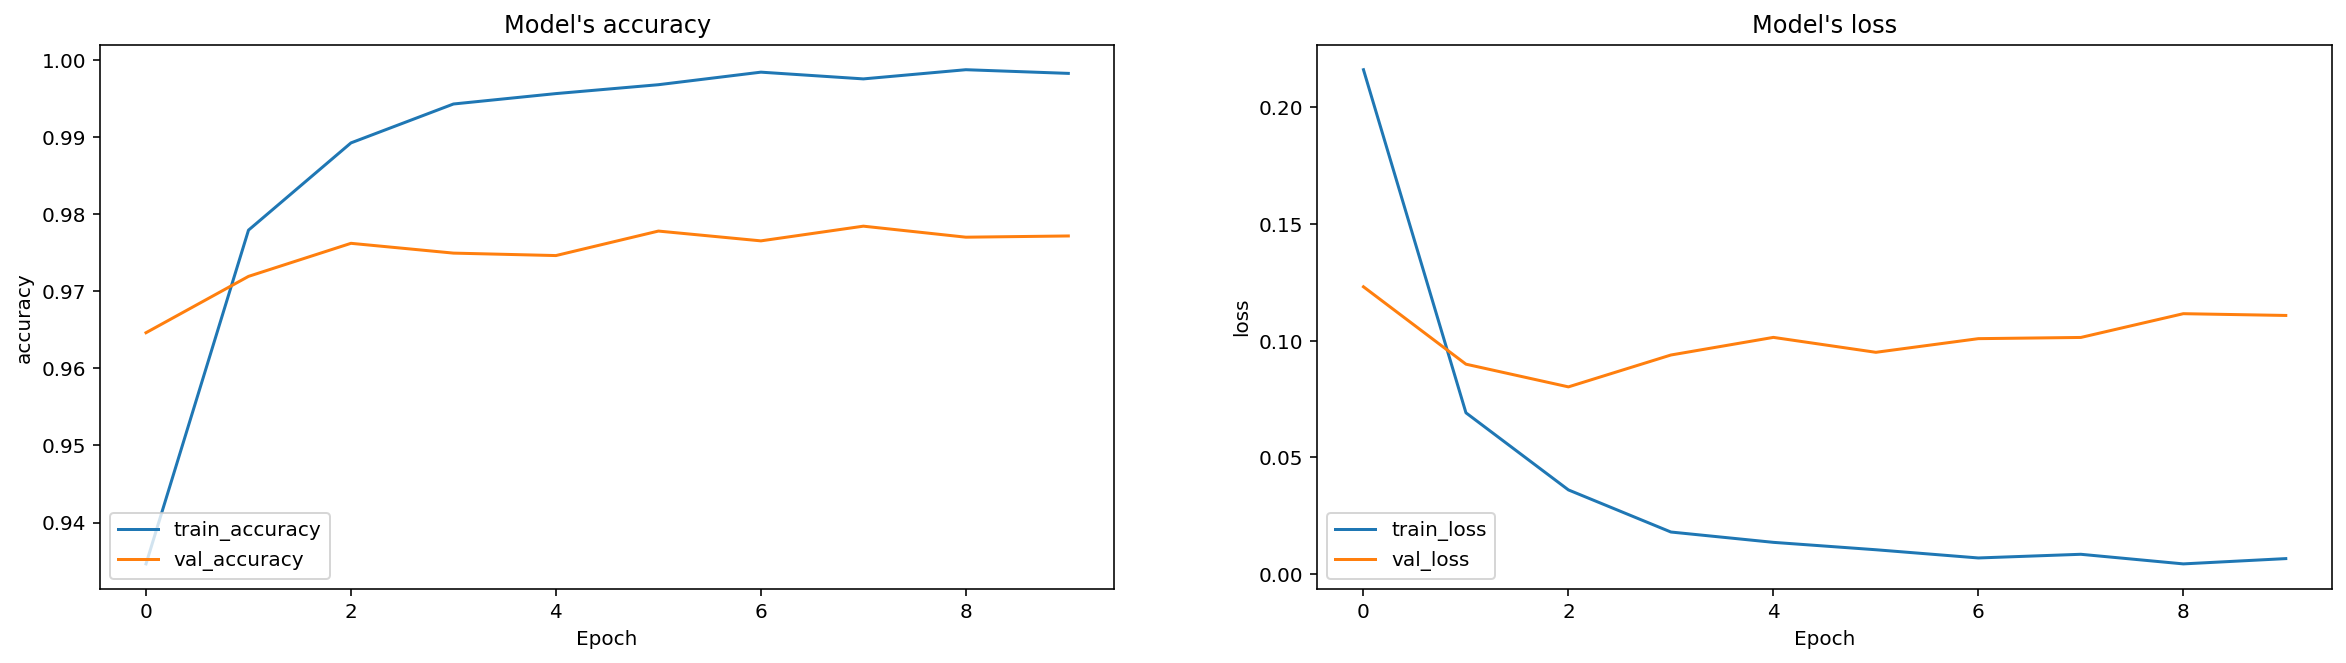

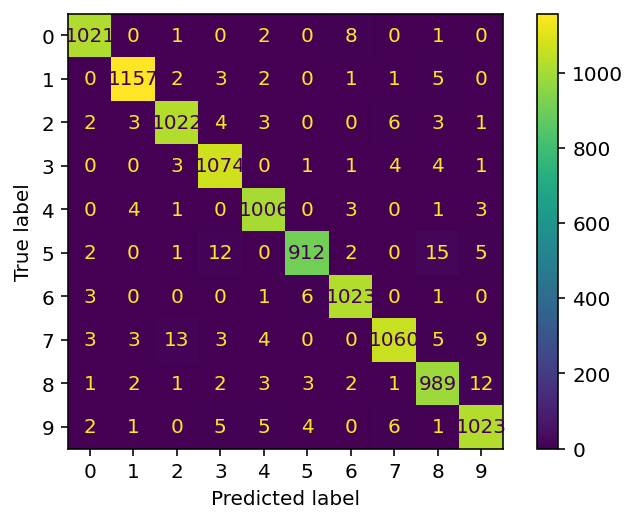

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1033
           1       0.99      0.99      0.99      1171
           2       0.98      0.98      0.98      1044
           3       0.97      0.99      0.98      1088
           4       0.98      0.99      0.98      1018
           5       0.98      0.96      0.97       949
           6       0.98      0.99      0.99      1034
           7       0.98      0.96      0.97      1100
           8       0.96      0.97      0.97      1016
           9       0.97      0.98      0.97      1047

    accuracy                           0.98     10500
   macro avg       0.98      0.98      0.98     10500
weighted avg       0.98      0.98      0.98     10500

25 first prediction (y_test|y_pred) :



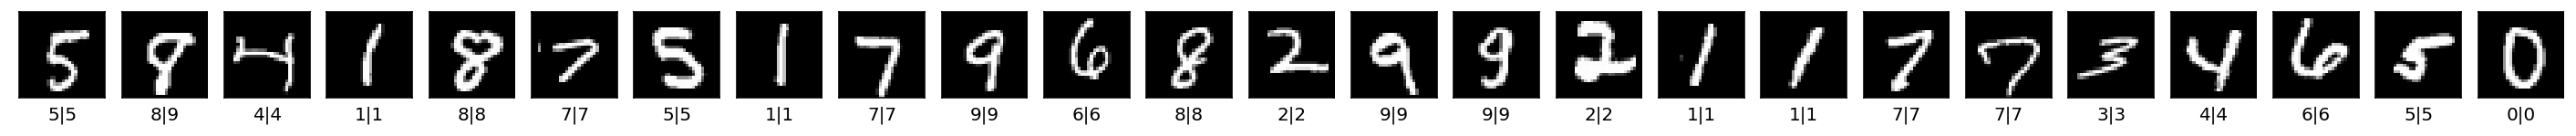

In [18]:
print('CNN RESULTS :\n')
plot_metrics(10, cnn_history.history)

y_pred = clf.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

evalute_model(y_test, y_pred)

print('25 first prediction (y_test|y_pred) :\n')
plot_predicted_img(X_test, np.array(y_test), y_pred)

> Avec une accuracy gloable de 0.98, le modèle de CNN est plus performant que notre ANN. Ce dernier sera choisit pour l'implémentation au sein de l'application.